In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import clear_session

In [2]:
# load data
np_data = np.load("data/dataRS.npy")
# ground truth
noise_output = np_data[:,-1].reshape(len(np_data),1)
input = np_data[:,:-1]

# split data
test_split = 0.33
x_train, x_test, y_train, y_test = train_test_split(input, noise_output, test_size=test_split, random_state=42)

### Enter your tag as unique id for saving

In [3]:
import time
timestr = time.strftime("%d%m%Y")
tag = str("encoderTest"+timestr)

In [4]:
latent_dim = 3
pca = PCA(n_components=latent_dim,)
dataPCA = pca.fit_transform(x_train)
encoderClassical = np.load("data/ENCdata_autoencoder-18032023.npy")
encoderQuantum1 = np.load("data/ENCdata_quantumAutoencoder-18032023.npy")
encoderQuantum2 = np.load("data/ENCdata_quantumAutoencoder2-18032023.npy")
print(dataPCA.shape, encoderClassical.shape, encoderQuantum1.shape, encoderQuantum2.shape)

(1007, 3) (1007, 3) (1007, 3) (1007, 3)


In [5]:
def plot_metrics(history):
    n = len(history.history.keys())//2
    fig,axs = plt.subplots(1,n, figsize=(18,5))

    for i,[key,val] in enumerate(history.history.items()):
        axs[i%n].plot(history.history[key], lw=4, label=key.replace("_", " "))
    
    for ax in axs:
        ax.set_yscale("log")
        ax.set_xlabel("epoch", fontsize=16)
        ax.legend(fontsize=14)

In [6]:
#Create a simple ANN
clear_session()
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
ann = Sequential([layer_0, layer_1, layer_2])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
31/31 [==============================] - 0s 4ms/step - loss: 15618.8701 - mean_absolute_error: 124.7777 - val_loss: 15636.8604 - val_mean_absolute_error: 124.8686
Epoch 2/500
31/31 [==============================] - 0s 1ms/step - loss: 15607.1572 - mean_absolute_error: 124.7303 - val_loss: 15625.8750 - val_mean_absolute_error: 124.8243
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 15595.0195 - mean_absolute_error: 124.6813 - val_loss: 15613.6650 - val_mean_absolute_error: 124.7751
Epoch 4/500
31/31 [==============================] - 0s 1ms/step - loss: 15580.9922 - mean_absolute_error: 124.6248 - val_loss: 15600.2939 - val_mean_absolute_error: 124.7214
Epoch 5/500
31/31 [==============================] - 0s 1ms/step - loss: 15566.1270 - mean_absolute_error: 124.5650 - val_loss: 15585.1826 - val_mean_absolute_error: 124.6606
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 15550.2480 - mean_absolute_error: 124.5012 - val_los

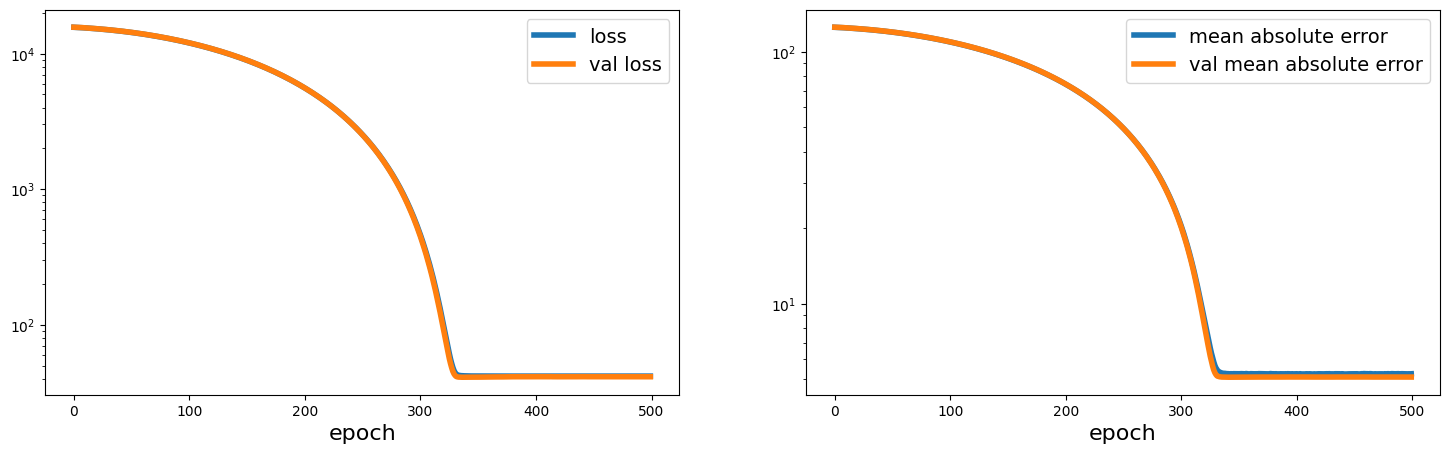

In [7]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annPCA = Sequential([layer_0, layer_1, layer_2])
annPCA.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyPCA = annPCA.fit(dataPCA, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyPCA)

Epoch 1/500
31/31 [==============================] - 0s 3ms/step - loss: 15653.7373 - mean_absolute_error: 124.9192 - val_loss: 15672.3496 - val_mean_absolute_error: 125.0125
Epoch 2/500
31/31 [==============================] - 0s 1ms/step - loss: 15653.7373 - mean_absolute_error: 124.9192 - val_loss: 15672.3496 - val_mean_absolute_error: 125.0125
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 15653.7363 - mean_absolute_error: 124.9192 - val_loss: 15672.3496 - val_mean_absolute_error: 125.0125
Epoch 4/500
31/31 [==============================] - 0s 1ms/step - loss: 15653.7354 - mean_absolute_error: 124.9192 - val_loss: 15672.3496 - val_mean_absolute_error: 125.0125
Epoch 5/500
31/31 [==============================] - 0s 1ms/step - loss: 15653.7363 - mean_absolute_error: 124.9192 - val_loss: 15672.3496 - val_mean_absolute_error: 125.0125
Epoch 6/500
31/31 [==============================] - 0s 1ms/step - loss: 15653.7363 - mean_absolute_error: 124.9192 - val_los

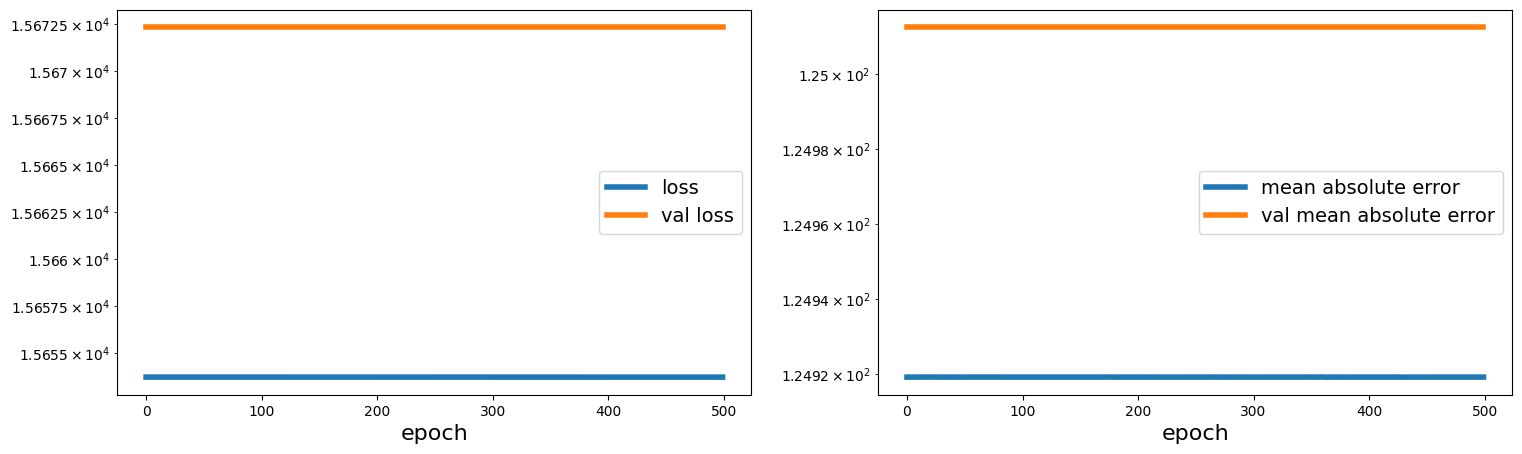

In [8]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annAEC = Sequential([layer_0, layer_1, layer_2])
annAEC.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyAEC = annAEC.fit(encoderClassical, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyAEC)

Epoch 1/500
31/31 [==============================] - 0s 4ms/step - loss: 15612.4834 - mean_absolute_error: 124.7557 - val_loss: 15619.1191 - val_mean_absolute_error: 124.8011
Epoch 2/500
31/31 [==============================] - 0s 1ms/step - loss: 15594.2129 - mean_absolute_error: 124.6828 - val_loss: 15600.5342 - val_mean_absolute_error: 124.7270
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 15575.6182 - mean_absolute_error: 124.6087 - val_loss: 15581.0254 - val_mean_absolute_error: 124.6491
Epoch 4/500
31/31 [==============================] - 0s 1ms/step - loss: 15556.0938 - mean_absolute_error: 124.5307 - val_loss: 15560.3457 - val_mean_absolute_error: 124.5665
Epoch 5/500
31/31 [==============================] - 0s 1ms/step - loss: 15535.3262 - mean_absolute_error: 124.4476 - val_loss: 15538.4004 - val_mean_absolute_error: 124.4789
Epoch 6/500
31/31 [==============================] - 0s 1ms/step - loss: 15513.2539 - mean_absolute_error: 124.3595 - val_los

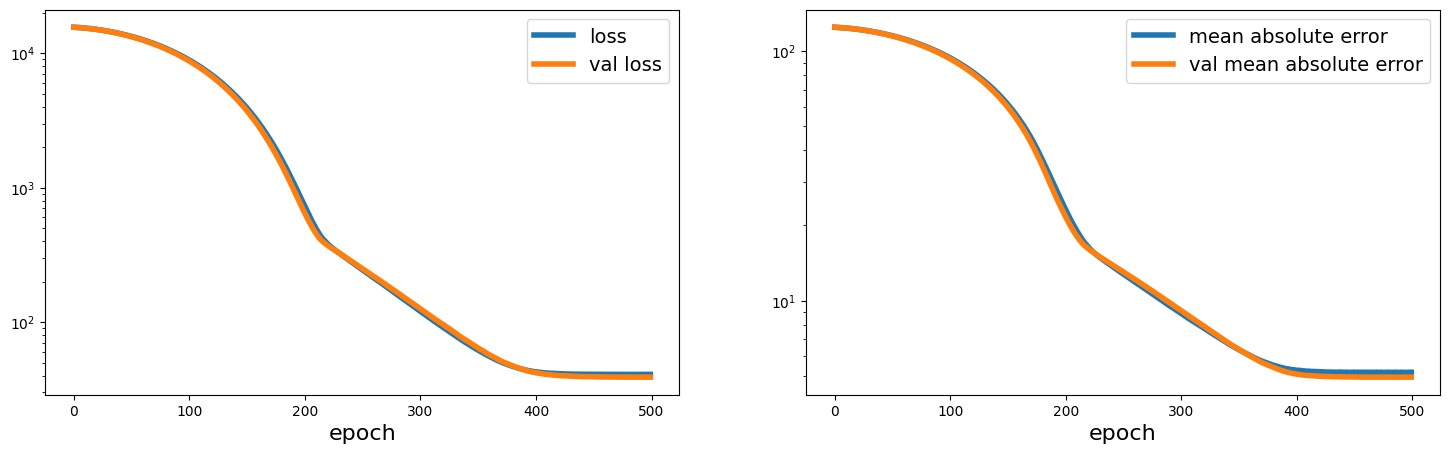

In [9]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annAEQ1 = Sequential([layer_0, layer_1, layer_2])
annAEQ1.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyAEQ1 = annAEQ1.fit(encoderQuantum1, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyAEQ1)

Epoch 1/500
31/31 [==============================] - 0s 4ms/step - loss: 15552.7129 - mean_absolute_error: 124.5137 - val_loss: 15517.2383 - val_mean_absolute_error: 124.3895
Epoch 2/500
31/31 [==============================] - 0s 1ms/step - loss: 15457.2715 - mean_absolute_error: 124.1294 - val_loss: 15426.0596 - val_mean_absolute_error: 124.0222
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 15366.2637 - mean_absolute_error: 123.7620 - val_loss: 15334.0977 - val_mean_absolute_error: 123.6506
Epoch 4/500
31/31 [==============================] - 0s 1ms/step - loss: 15274.0508 - mean_absolute_error: 123.3885 - val_loss: 15240.7178 - val_mean_absolute_error: 123.2721
Epoch 5/500
31/31 [==============================] - 0s 1ms/step - loss: 15180.5205 - mean_absolute_error: 123.0085 - val_loss: 15146.0537 - val_mean_absolute_error: 122.8873
Epoch 6/500
31/31 [==============================] - 0s 1ms/step - loss: 15085.6982 - mean_absolute_error: 122.6220 - val_los

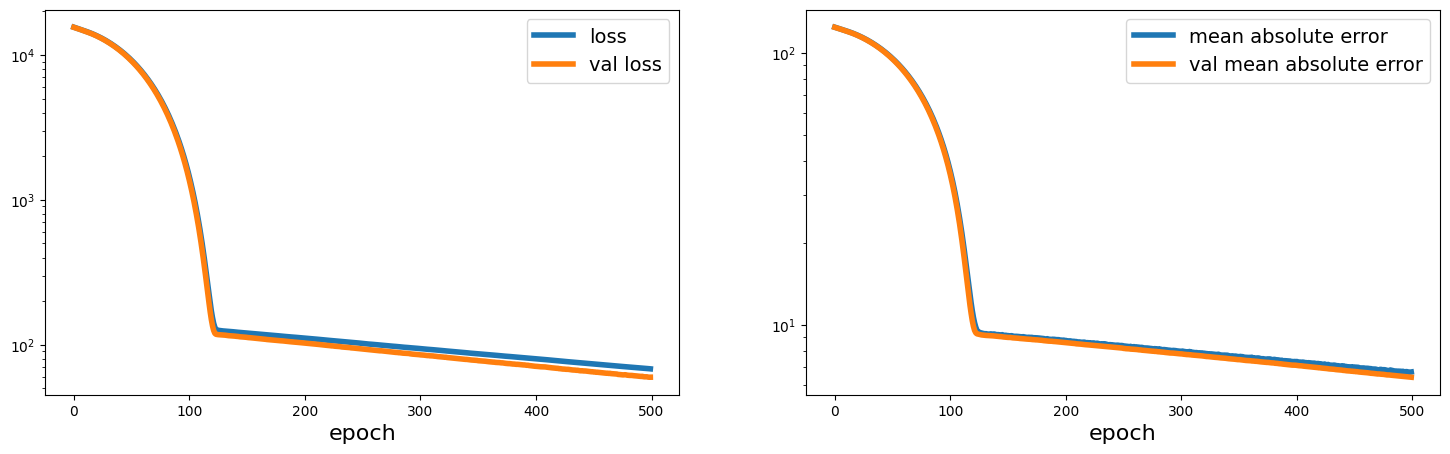

In [10]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annAEQ2 = Sequential([layer_0, layer_1, layer_2])
annAEQ2.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyAEQ2 = annAEQ2.fit(encoderQuantum2, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyAEQ2)

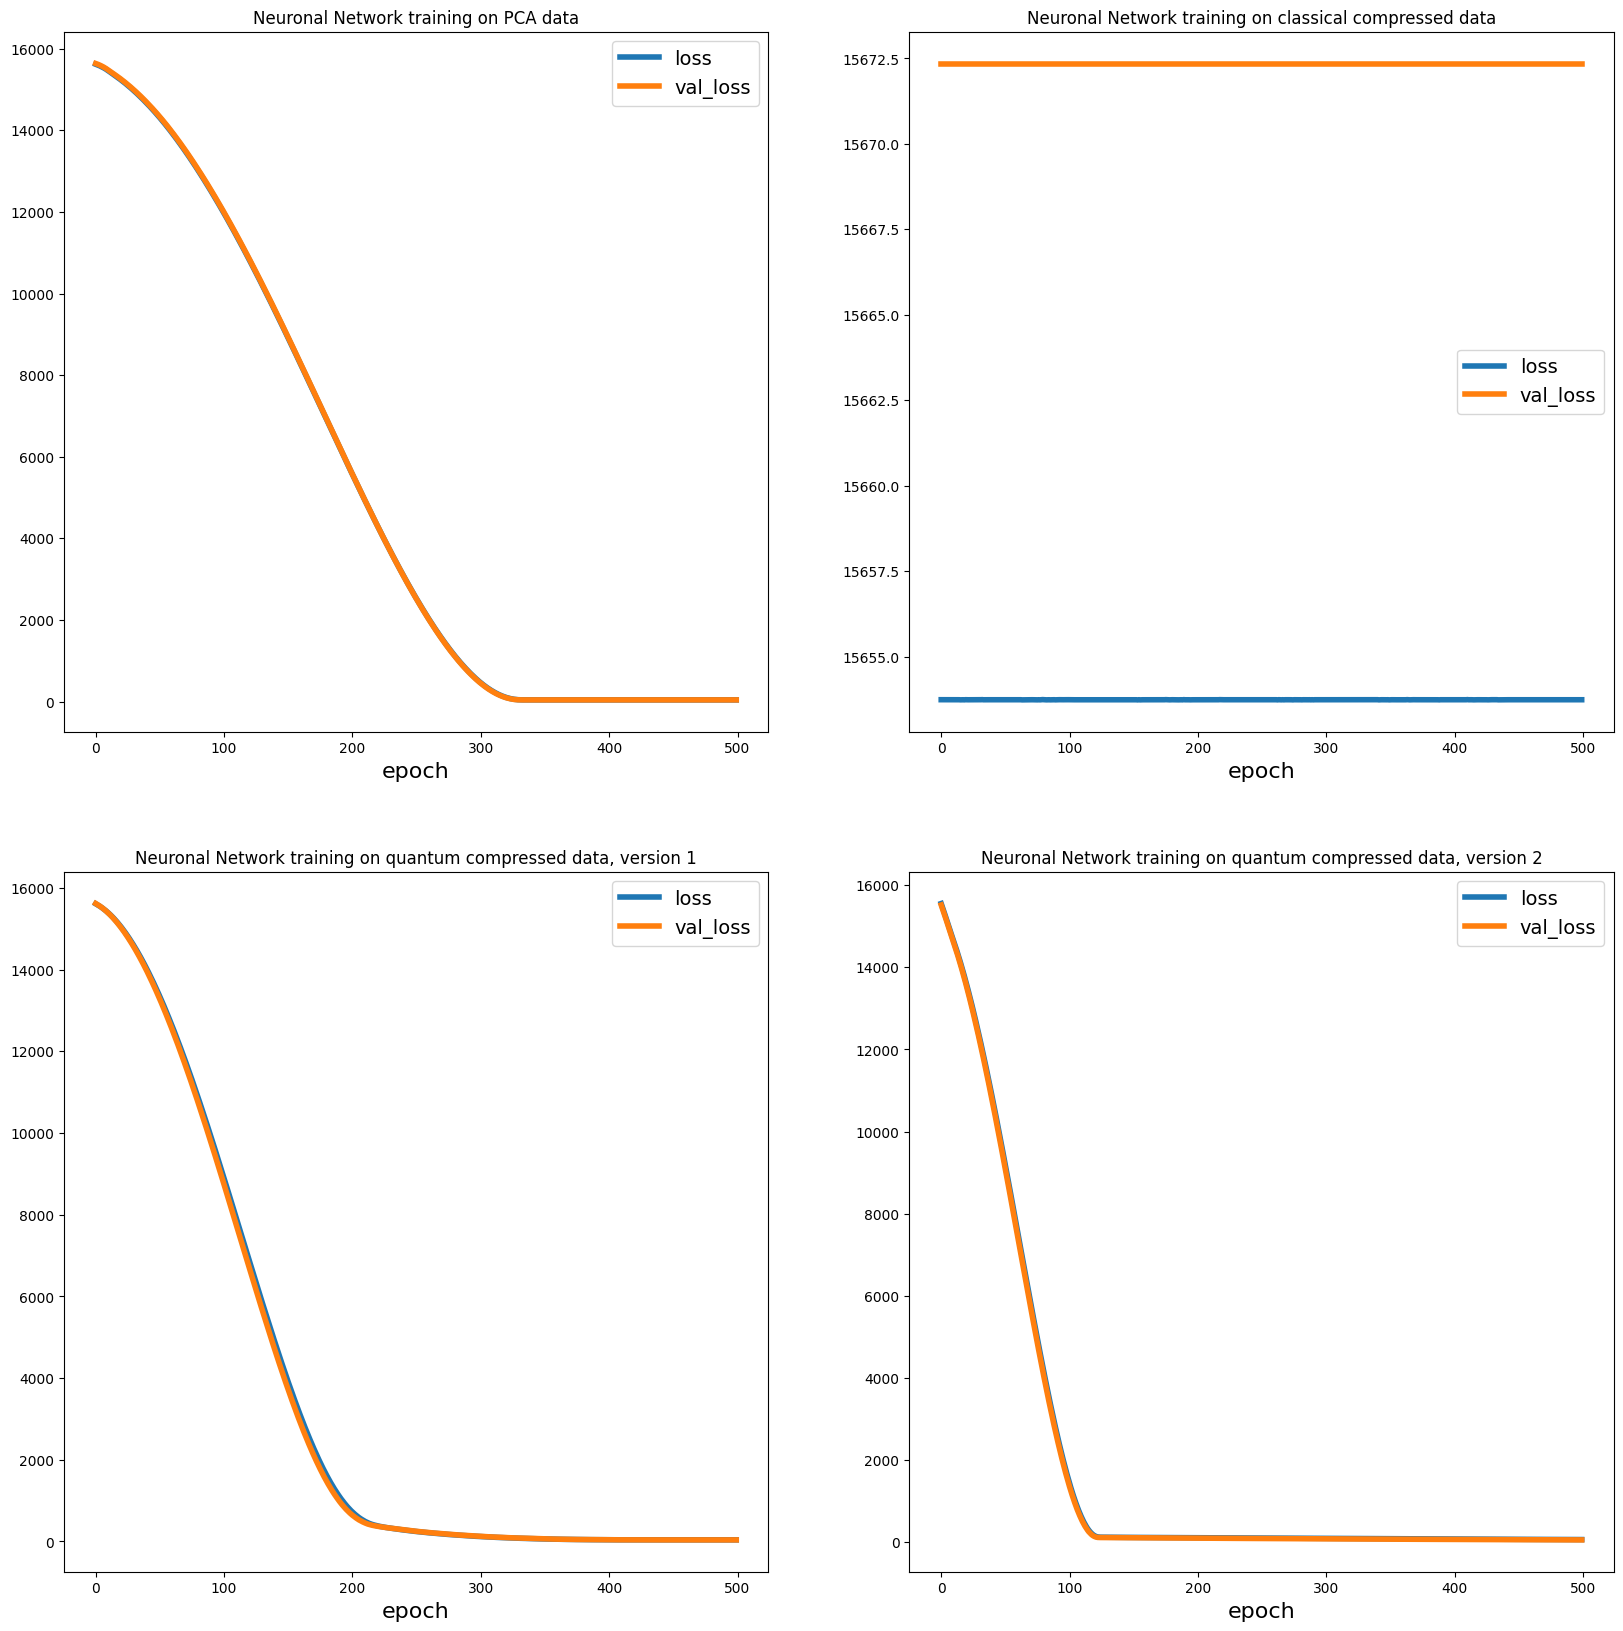

In [11]:
fig,axs = plt.subplots(2,2, figsize=(20, 20))
axs[0,0].plot(ann_historyPCA.history['loss'], lw=4, label='loss')
axs[0,0].plot(ann_historyPCA.history['val_loss'], lw=4, label='val_loss')
axs[0,0].set_xlabel("epoch", fontsize=16)
axs[0,0].set_title("Neuronal Network training on PCA data")
axs[0,0].legend(fontsize=14)
#-------------------------------
axs[0,1].plot(ann_historyAEC.history['loss'], lw=4, label='loss')
axs[0,1].plot(ann_historyAEC.history['val_loss'], lw=4, label='val_loss')
axs[0,1].set_xlabel("epoch", fontsize=16)
axs[0,1].set_title("Neuronal Network training on classical compressed data")
axs[0,1].legend(fontsize=14)
#-------------------------------
axs[1,0].plot(ann_historyAEQ1.history['loss'], lw=4, label='loss')
axs[1,0].plot(ann_historyAEQ1.history['val_loss'], lw=4, label='val_loss')
axs[1,0].set_xlabel("epoch", fontsize=16)
axs[1,0].set_title("Neuronal Network training on quantum compressed data, version 1")
axs[1,0].legend(fontsize=14)
#-------------------------------
axs[1,1].plot(ann_historyAEQ2.history['loss'], lw=4, label='loss')
axs[1,1].plot(ann_historyAEQ2.history['val_loss'], lw=4, label='val_loss')
axs[1,1].set_xlabel("epoch", fontsize=16)
axs[1,1].set_title("Neuronal Network training on quantum compressed data, version 2")
axs[1,1].legend(fontsize=14)

plt.show()
fig.savefig("archive/history-"+tag+".png")

In [12]:
annPCA.save("archive/model-"+tag+"PCA.h5")
annPCA.save_weights("archive/weights-"+tag+"PCA.h5")
config = annPCA.get_config()
np.save("archive/config-"+tag+"PCA.npy", config)
#------------------
annAEC.save("archive/model-"+tag+"AEC.h5")
annAEC.save_weights("archive/weights-"+tag+"AEC.h5")
config = annAEC.get_config()
np.save("archive/config-"+tag+"AEC.npy", config)
#------------------
annAEQ1.save("archive/model-"+tag+"AEQ1.h5")
annAEQ1.save_weights("archive/weights-"+tag+"AEQ1.h5")
config = annAEQ1.get_config()
np.save("archive/config-"+tag+"AEQ1.npy", config)
#------------------
annAEQ2.save("archive/model-"+tag+"AEQ2.h5")
annAEQ2.save_weights("archive/weights-"+tag+"AEQ2.h5")
config = annAEQ2.get_config()
np.save("archive/config-"+tag+"AEQ2.npy", config)